# App Stat Exam2018

## Importing libraries:

In [10]:
#Other good imports                        
from numpy.linalg import matrix_power                                                                       
from iminuit import Minuit                                                                 
from scipy.integrate import quad
import sympy as sp
from sympy import integrate , print_latex
import pandas as pd
from IPython.display import display


#Packages needed for the external functions
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import roc_curve, auc
from iminuit.util import make_func_code
from iminuit import describe 


# import sequence of functions from external file
import sys 
sys.path.append('../FINAL_EXAM_2023')
from MyExternalFunctionsForExam import *

Matplotlib_settings()

## 1) Distributions and probabilities

### 1.1) 

In [160]:
#1.1.1)

p = 18/37 

P_25_wins = stats.binom.pmf(25, 50, p)
P_26_or_more_wins = stats.binom.sf(25, 50, p)

print(f'Probability of 25 wins: {P_25_wins:.3f}')
print(f'Probability of 26 or more wins: {P_26_or_more_wins:.3f}')


#1.1.2)

Ntries = range(100)

N_tries_for_20_wins = np.where(stats.binom.sf(20, Ntries, p) >= 0.95)[0][0]

print(f'Number of tries needed for 20 wins: {N_tries_for_20_wins}, for which the probability is {stats.binom.sf(20, N_tries_for_20_wins, p):.3f}')
print(f'In comparison, the probability of 20 wins in {N_tries_for_20_wins-1} tries is {stats.binom.sf(20, N_tries_for_20_wins-1, p):.3f}')


Probability of 25 wins: 0.110
Probability of 26 or more wins: 0.369
Number of tries needed for 20 wins: 55, for which the probability is 0.955
In comparison, the probability of 20 wins in 54 tries is 0.943


### 1.2)

In [12]:
# two-sided probability of drawing a number between 1.2sigma and 2.4sigma
P_gaussian_nr_between = 2*(stats.norm.sf(1.2)-stats.norm.sf(2.4))

### 1.3)

In [13]:
#1.3.1) Number of daily hospital mistakes follow a Poisson distribution

#1.3.2) Days with more than 8 mistakes are considered “critical days”. 
#If there were 22 “critical days” in a normal year, what is your estimate for the average number of daily mistakes?

p = 22/365
print(f'Probability of 22 critical days in a normal year: {p:.4f}')

#finding the average number of daily mistakes numerically

x_space = np.linspace(0, 8, 1000)
Num_integration = stats.poisson.cdf(8,x_space)

Lambda = x_space[np.where(Num_integration > (1-p))[0][-1]]

print(f'Average number of daily mistakes: {Lambda:.2f}')



Probability of 22 critical days in a normal year: 0.0603
Average number of daily mistakes: 4.87


## 2) Error Propagation

### 2.1) 

removing the outlier from sample 1 gives: 2.532 +/- 0.066
Combining the two results gives: 2.599 +/- 0.031
With a p-value of: 0.249, and a chi2 of: 1.33 / 1 = 1.33


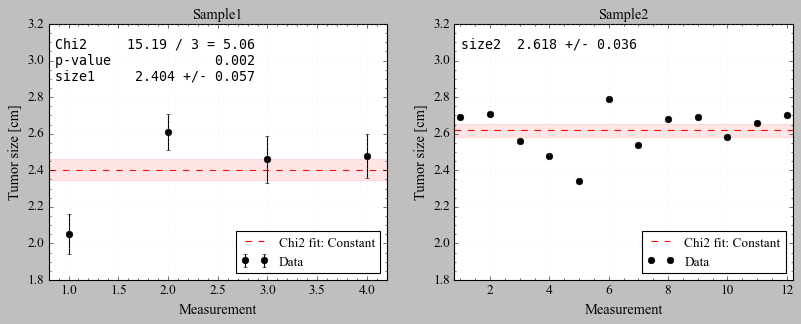

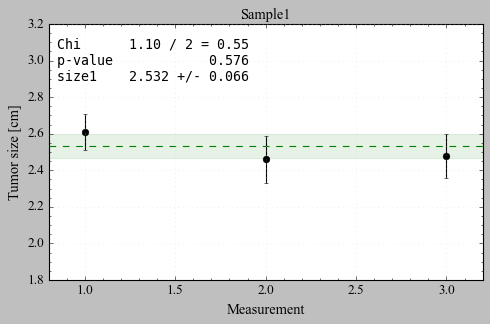

In [14]:
tumor_data1 = np.array([2.05,2.61,2.46,2.48])
tumor_err1 = np.array([0.11,0.10,0.13,0.12])
tumor_data2 = np.array([2.69, 2.71, 2.56, 2.48, 2.34, 2.79, 2.54, 2.68, 2.69, 2.58, 2.66, 2.70])




#2.1.1)

#I do a chi2 test to see if the measurements agree with each other

def constant(x,a):
    return a 

chi2 = Chi2Regression(constant,range(1,5), tumor_data1, tumor_err1)

minuit = Minuit(chi2, a=2.5)
minuit.migrad();
size1 = minuit.values['a']
size1_err = minuit.errors['a']


fig, ax = plt.subplots(1,2,figsize=(12, 4))
ax[0].errorbar(range(1,5), tumor_data1, yerr=tumor_err1, fmt='o', color='k', label='Data')
ax[0].set(xlabel='Measurement', ylabel='Tumor size [cm]', title='Sample1', xlim=(0.8,4.2), ylim=(1.8,3.2))
ax[0].axhline(size1, color='r', linestyle='--', label='Chi2 fit: Constant')
ax[0].axhspan(size1-size1_err, size1+size1_err, color='r', alpha=0.1)
ax[0].legend(loc='lower right')

pval1, chistring1 = Chi2prob(minuit, len(tumor_data1))
d1 = {'Chi2': chistring1, 'p-value': pval1, 'size1':[size1,size1_err]}
text1 = nice_string_output(d1, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.95, text1, ax[0], fontsize=12)


size2 = np.mean(tumor_data2)
size2_err = 1/np.sqrt(len(tumor_data2))*np.std(tumor_data2,ddof=1)

ax[1].errorbar(range(1,13), tumor_data2, fmt='o', color='k', label='Data')
ax[1].set(xlabel='Measurement', ylabel='Tumor size [cm]', title='Sample2', xlim=(0.8,12.2), ylim=(1.8,3.2))
ax[1].axhline(size2, color='r', linestyle='--', label='Chi2 fit: Constant')
ax[1].axhspan(size2-size2_err, size2+size2_err, color='r', alpha=0.1)
ax[1].legend(loc='lower right')

pval2, chistring2 = Chi2prob(minuit, len(tumor_data2))
d2 = {'size2':[size2,size2_err]}
text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.95, text2, ax[1], fontsize=12)

#the measurements from sample 1 do not agree with each other due to the outlier (2.05), while the measurements from sample 2 doagree with each other

tumor_data_improv = np.array([2.61,2.46,2.48])
tumor_improv_err = np.array([0.10,0.13,0.12])
chi2 = Chi2Regression(constant,range(1,4), tumor_data_improv, tumor_improv_err)
minuit = Minuit(chi2, a=2.5)
minuit.migrad()
size1_improv, size1_improv_err = minuit.values['a'], minuit.errors['a']
pval_improv, chistring_improv = Chi2prob(minuit, len(tumor_data_improv))

print(f'removing the outlier from sample 1 gives: {size1_improv:.3f} +/- {size1_improv_err:.3f}')
fig,ax = plt.subplots(figsize=(7, 4))
ax.errorbar(range(1,4), tumor_data_improv, yerr=tumor_improv_err, fmt='o', color='k', label='Data')
ax.axhline(size1_improv, color='g', linestyle='--', label='Chi2 fit: whitout outlier')
ax.axhspan(size1_improv-size1_improv_err, size1_improv+size1_improv_err, color='g', alpha=0.1)
ax.set(xlabel='Measurement', ylabel='Tumor size [cm]', title='Sample1', xlim=(0.8,3.2), ylim=(1.8,3.2))

d = {'Chi': chistring_improv, 'p-value': pval_improv, 'size1':[size1_improv,size1_improv_err]}
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.95, text, ax, fontsize=12)


#2.1.2) The most precise measurement is the one with the smallest error, so the measurement from sample 2 is the most precise


#2.1.3) The best estimate of the tumor size would be to combine the two results in a weighted mean


chi2 = Chi2Regression(constant,range(1,3), [size1_improv, size2], [size1_improv_err, size2_err])
minuit = Minuit(chi2, a=2.5)
minuit.migrad()

size_combined, size_combined_err = minuit.values['a'], minuit.errors['a']
pval_combined, chistring_combined = Chi2prob(minuit, len([size1_improv, size2]))

print(f'Combining the two results gives: {size_combined:.3f} +/- {size_combined_err:.3f}')
print(f'With a p-value of: {pval_combined:.3f}, and a chi2 of: {chistring_combined}')


### 2.2) 

In [15]:
c = 299700000 #m/s
h = 6.626e-34 #J*s
kb = 1.381e-23 #J/K


plancks_law = '2*h*nu**3/c**2/(exp(h*nu/(kb*T))-1)'         # B(nu,T)
plancks_law = '2*(6.626e-34)*nu**3/(299700000)**2/(exp(6.626e-34*nu/(1.381e-23*T))-1)'         # B(nu,T)



#2.2.1)
eq , func, err_func, contrib = Errorpropagation(plancks_law, 'nu T')

#Given values of ν = (0.566 ± 0.025) × 1015 Hz and T = (5.50 ± 0.29) × 103 K (uncorrelated), what is the expected spectral radiance, B

nu = 0.566e15
nu_err = 0.025e15
T = 5.50e3
T_err = 0.29e3

B = func(nu,T)
B_err = err_func(nu,T,nu_err,T_err)

print(f'The expected spectral radiance is: ({B:.3} +/- {B_err:.2}) W/m^2/sr/Hz')



#2.2.2) Now with correlation coefficient of 0.87

eq_cor, func_cor, err_func_cor = Errorpropagation(plancks_law, 'nu T', rho=0.87)
B_cor = func_cor(nu,T)
B_err_cor = err_func_cor(nu,T,nu_err,T_err)

print(f'The correlated spectral radiance is: ({B_cor:.3} +/- {B_err_cor:.2}) W/m^2/sr/Hz')
print(f'which is a difference in uncertainty of: {B_err_cor-B_err:.3} W/m^2/sr/Hz')


The expected spectral radiance is: (1.93e-08 +/- 5.3e-09) W/m^2/sr/Hz
The correlated spectral radiance is: (1.93e-08 +/- 3.7e-09) W/m^2/sr/Hz
which is a difference in uncertainty of: -1.64e-09 W/m^2/sr/Hz


## 3) Simulation / Monte Carlo 

### 3.1)

The normalization constant is: 1/(exp(-4)/2 + 3/2) = 0.663
The mean is: -exp(4)/(2 + 6*exp(4)) + 5/(2 + 6*exp(4)) + 4*exp(4)/(1 + 3*exp(4)) = 1.175
The RMS is: sqrt(-exp(4)/(2 + 6*exp(4)) + 13/(2 + 6*exp(4)) + 16*exp(4)/(3 + 9*exp(4))) = 1.281
The p-value is: 0.99992
0.6238914146165048


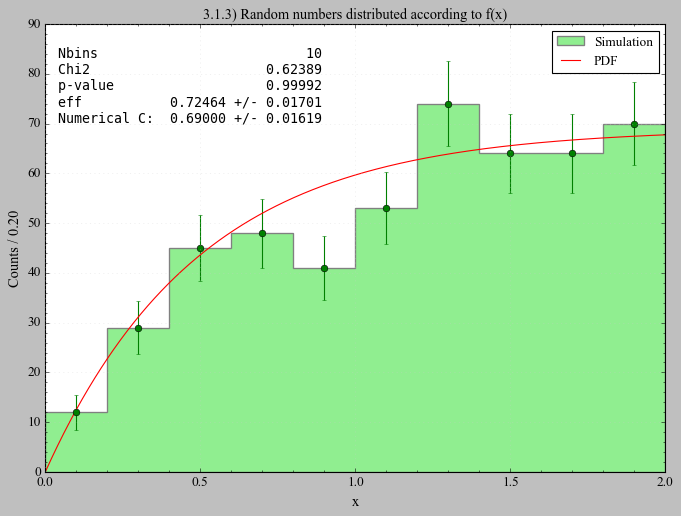

In [16]:
# PDF: f(x) = C*(1-exp(-a*x)) on x=[0,2] and a=2


#3.1.1) 
#analytical solution using sympy
x = sp.symbols('x')
f = '(1-exp(-2*x))'
integral = integrate(f, (x, 0, 2))
C = 1/integral
print(f'The normalization constant is: {C} = {C.evalf():.3f}')
f_norm = f+'*'+str(C)

mean = integrate(f_norm+'*x', (x, 0, 2))
print(f'The mean is: {mean} = {mean.evalf():.3f}')

RMS = sp.sqrt(integrate(f_norm+'*x**2', (x, 0, 2)))
print(f'The RMS is: {RMS} = {RMS.evalf():.3f}')

#3.1.2) To simulatate I use the accept/reject methode can be used, since the PDF is bounded and because it cannot be invertible. 

#3.1.3) 500 random numbers distributed according to f(x) are generated using the accept/reject method

x_range= (0,2)
N_accepted = 500
N_bins = 10

def PDF_func(x):
    return (1-np.exp(-2*x))

x_accepted, N_tries, effeciency , integral , normalization = Accept_reject(PDF_func,x_range, (0,1), N_accepted)
fig , ax, counts, bincenters, binwidth = easy_hist(x_accepted, xrange=x_range,Nbins=N_bins,Figsize=(10,7),title='3.1.3) Random numbers distributed according to f(x)');

x_axis = np.linspace(x_range[0],x_range[1],1000)
ax.plot(x_axis,N_accepted*binwidth*normalization[0]*PDF_func(x_axis), label='PDF',c='r')
ax.legend(['Simulation','PDF'])

def Chi2_friendly_PDF(x):
    return N_accepted*binwidth*normalization[0]*(1-np.exp(-2*x))

Chi2 = np.sum((Chi2_friendly_PDF(bincenters) - counts)/ counts)
pval = stats.chi2.sf(Chi2,len(bincenters)-1)
print(f'The p-value is: {pval:.5f}')
print(Chi2)

d = {'Nbins':N_bins,'Chi2': Chi2, 'p-value': pval, 'eff':effeciency, 'Numerical C:': normalization}
text = nice_string_output(d, extra_spacing=2, decimals=5)
add_text_to_ax(0.02, 0.95, text, ax, fontsize=12)



c:\Users\simon\OneDrive\Andet\Sikkerhedskopiering\GitHub\AppStat2022\exam2018\../FINAL_EXAM_2023\MyExternalFunctionsForExam.py:949: RuntimeWarning: invalid value encountered in log1p
  return -x*np.log1p( (x-y) / y )
c:\Users\simon\OneDrive\Andet\Sikkerhedskopiering\GitHub\AppStat2022\exam2018\../FINAL_EXAM_2023\MyExternalFunctionsForExam.py:949: RuntimeWarning: divide by zero encountered in log1p
  return -x*np.log1p( (x-y) / y )


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.772                      │              Nfcn = 149              │
│ EDM = 1.48e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    1.8    │    0.4    │            │            │         │         │       │
│ 1 │ N    │    346    │    31     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     a     N │
├───┼─────────────┤
│ a │ 0.165 -11.1 │
│ N │ -11.1   988 │
└───┴─────────────┘

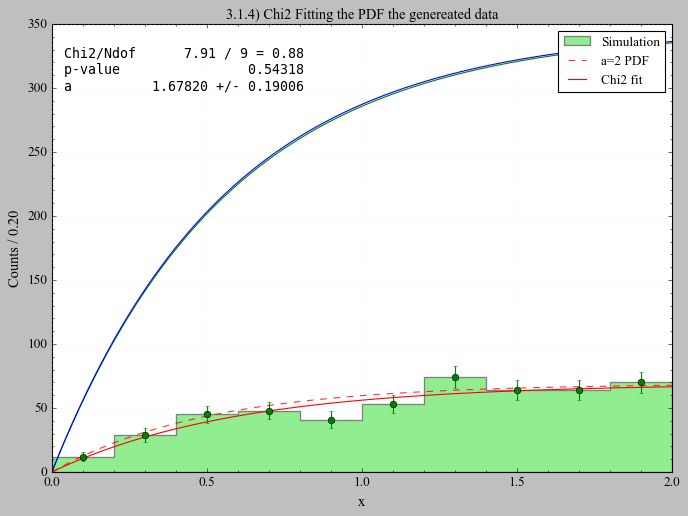

In [17]:
# 3.1.4) Chi2 Fitting the PDF the genereated data

def Fitting_PDF(x,a):
    return N_accepted*binwidth*normalization[0]*(1-np.exp(-a*x))

Chi2_fit = Chi2Regression(Fitting_PDF, bincenters, counts, np.sqrt(counts))
minuit = Minuit(Chi2_fit, a=2)
minuit.migrad()

a, a_err = minuit.values['a'], minuit.errors['a']

fig, ax, counts, bincenters, binwidth = easy_hist(x_accepted, xrange=x_range,Nbins=N_bins,Figsize=(10,7),title='3.1.4) Chi2 Fitting the PDF the genereated data');
ax.plot(x_axis,N_accepted*binwidth*normalization[0]*PDF_func(x_axis),'r--', label='a=2 PDF',alpha=0.8)
ax.plot(x_axis,Fitting_PDF(x_axis,a), label='Chi2 fit',c='r')
ax.legend(['Simulation','a=2 PDF','Chi2 fit'])

pval , chistring = Chi2prob(minuit, len(bincenters))

d = {'Chi2/Ndof': chistring, 'p-value': pval, 'a': [a,a_err]}
text = nice_string_output(d, extra_spacing=2, decimals=5)
add_text_to_ax(0.02, 0.95, text, ax, fontsize=12)

#It is quite low statitistics, so I will try with a LLH fit
def LLH_fit_func(x,a,N):
    return N*(1-np.exp(-a*x))

bLLH = BinnedLH(LLH_fit_func, x_accepted, bins=N_bins, bound=x_range, extended=True)
LLHminuit = Minuit(bLLH, a=3, N=60)
LLHminuit.errordef = 0.5     # Value for likelihood fits
LLHminuit.migrad()
a_bLLH, N_bLLH, a_err_bLLH,  N_err_bLLH = *LLHminuit.values, *LLHminuit.errors

ubLLH = UnbinnedLH(LLH_fit_func, x_accepted, bound=x_range, extended=True)
uLLHminuit = Minuit(ubLLH, a=1.6, N=100)
uLLHminuit.errordef = 0.5     # Value for likelihood fits
uLLHminuit.migrad()
a_uLLH, N_uLLH, a_err_uLLH,  N_err_uLLH = *uLLHminuit.values, *uLLHminuit.errors

ax.plot(x_axis,LLH_fit_func(x_axis,a_bLLH,N_bLLH), label='LLH fit',c='g')
ax.plot(x_axis,LLH_fit_func(x_axis,a_uLLH,N_uLLH), label='LLH fit',c='b')


LLHminuit

Anderson-Darling test: (0.4333240514472436, array([0.574, 0.653, 0.784, 0.914, 1.088]), array([15. , 10. ,  5. ,  2.5,  1. ]))
Shapiro-Wilk test: ShapiroResult(statistic=0.9975787401199341, pvalue=0.14722700417041779)


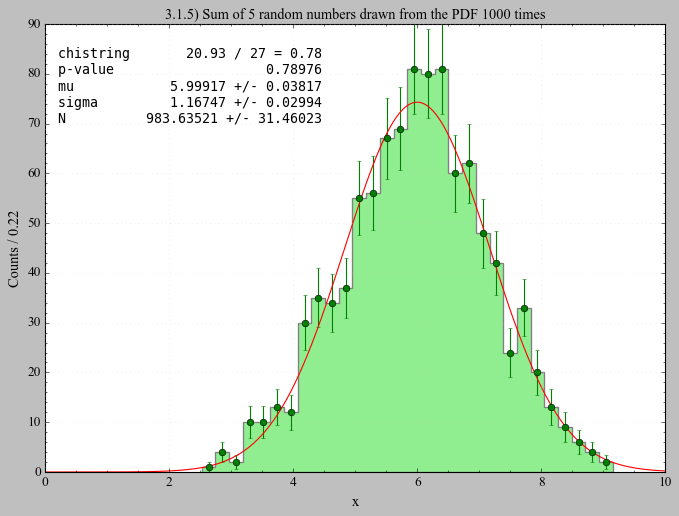

In [18]:
# 3.1.5) According to CLT the sum of 5 random numbers drawn from the PDF 1000 times should be gaussianly distributed.

N = 1000
N_sum = 5
x_sum = np.zeros(N)
for i in range(N):
    x_sum[i] = np.sum(np.random.choice(x_accepted,N_sum))

fig, ax, counts, bincenters, binwidth = easy_hist(x_sum,Nbins=30,Figsize=(10,7),title='3.1.5) Sum of 5 random numbers drawn from the PDF 1000 times');

# fit a gaussian to the data
def gaussian(x, mu, sigma, n):
    return n*binwidth*stats.norm.pdf(x, mu, sigma)

Chi2_fit = Chi2Regression(gaussian, bincenters, counts, np.sqrt(counts))
minuit = Minuit(Chi2_fit, mu=6, sigma=1, n=1000)
minuit.migrad()

mu,sigma,n , mu_err, sigma_err, N_err = *minuit.values , *minuit.errors

x_axis = np.linspace(0,10,1000)
ax.plot(x_axis,gaussian(x_axis,mu,sigma,n), label='Fitted Gaussian',c='r')

pval , chistring = Chi2prob(minuit, len(bincenters))

d = {'chistring': chistring, 'p-value': pval, 'mu': [mu,mu_err], 'sigma': [sigma,sigma_err], 'N': [n,N_err]}
text = nice_string_output(d, extra_spacing=2, decimals=5)
add_text_to_ax(0.02, 0.95, text, ax, fontsize=12)

#nice gaussian! Testing with Shapiro-Wilk test and Anderson-Darling test

print(f'Anderson-Darling test: {stats.anderson(x_sum,dist="norm")[0:3]}')
print(f'Shapiro-Wilk test: {stats.shapiro(x_sum)}')

#very guassian for for low N but above 1000 it becomes skewed  

## 4) Statistical Tests

### 4.1)

In [19]:
# The National UFO Reporting Center (NUFORC) has since 1974 catalogued reported
# UFO sightings. A subset of the data with 64719 entries containing date, time, place, shape, and
# duration of observation can be found at www.nbi.dk/∼petersen/data UfoSightings.txt.
# • Plot the distribution of duration of observation, and calculate both mean and median.

#load data
data = np.loadtxt('data_UfoSightings.txt',skiprows=4, usecols=(1,2,3,5,7))
hours_in_day , days_in_year , weekday, coast, duration = data.T


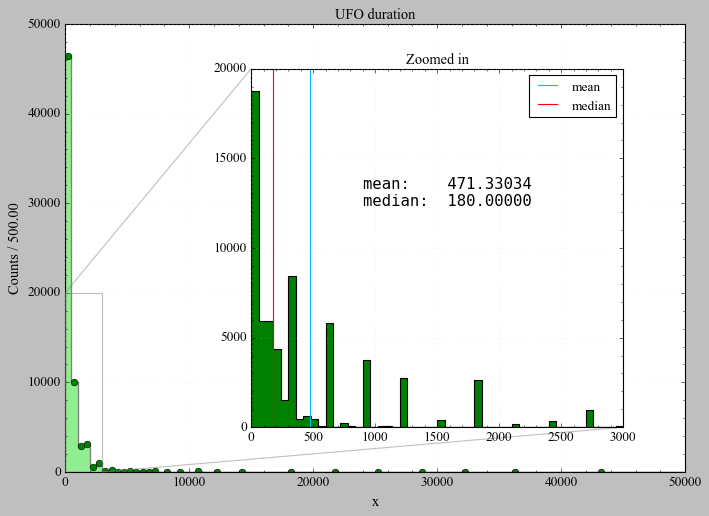

In [20]:
# • Calculate the mean and median of the distribution of duration of observation.
mean = np.mean(duration)
median = np.median(duration)

fig,ax,counts,bincenters,binwidth = easy_hist(duration, Nbins=100,xrange=(0,50000), Figsize=(10,7), title='UFO duration');
zoom_ax = ax.inset_axes([0.3, 0.1, 0.6, 0.8])
zoom_ax.hist(duration, bins=50, range=(0,3000), histtype='stepfilled', color='green', lw=1)
zoom_ax.axvline(mean, color='deepskyblue', label='mean')
zoom_ax.axvline(median, color='r', label='median')
zoom_ax.set_title('Zoomed in')
zoom_ax.legend()
ax.indicate_inset_zoom(zoom_ax)




d = {'mean:': mean, 'median:': median}
text = nice_string_output(d, extra_spacing=2, decimals=5)
add_text_to_ax(0.3, 0.7, text, zoom_ax, fontsize=14)

East coast mean: 461.972275266992
West coast mean: 493.43587759182225
Kolmogorov-Smirnov test: KstestResult(statistic=0.04, pvalue=0.999998821968263)


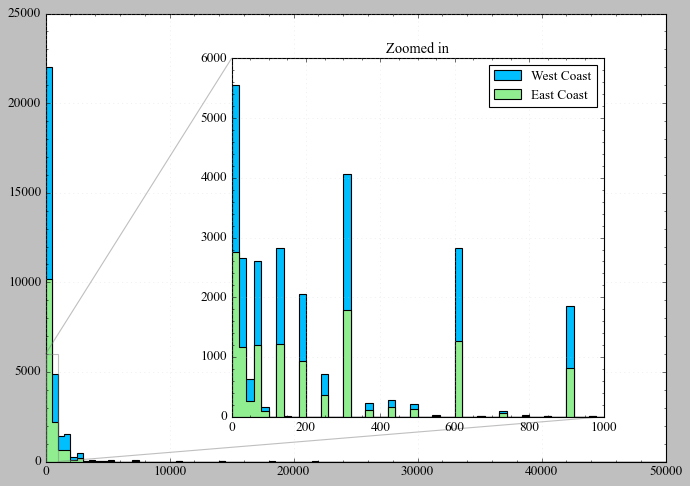

In [21]:
# 4.1.2) 

east_dur = duration[coast==1]
west_dur = duration[coast==0]

print(f'East coast mean: {np.mean(east_dur)}')
print(f'West coast mean: {np.mean(west_dur)}')

# • Plot the distribution of duration of observation for the two coast groups separately.
Nbins = 100
fig,ax = plt.subplots(figsize=(10,7))
ax.hist(west_dur, bins=Nbins, range=(0,50000), histtype='stepfilled', color='deepskyblue', lw=1, label='West Coast')
ax.hist(east_dur, bins=Nbins, range=(0,50000), histtype='stepfilled', color='lightgreen', lw=1, label='East Coast');
zoom_ax = ax.inset_axes([0.3, 0.1, 0.6, 0.8])
zoom_ax.hist(west_dur, bins=50, range=(0,1000), histtype='stepfilled', color='deepskyblue', lw=1, label='West Coast')
zoom_ax.hist(east_dur, bins=50, range=(0,1000), histtype='stepfilled', color='lightgreen', lw=1, label='East Coast');
zoom_ax.set_title('Zoomed in')
zoom_ax.legend()
ax.indicate_inset_zoom(zoom_ax);

# statistical test to see if the two distributions are the same
west_counts, west_bin_edges = np.histogram(west_dur, bins=Nbins, range=(0,50000))
east_counts, east_bin_edges = np.histogram(east_dur, bins=Nbins, range=(0,50000))

print(f'Kolmogorov-Smirnov test: {stats.ks_2samp(west_counts,east_counts)}')

#They are the same


Pearson correlation coefficient: 0.0240, with p-value: 9.79e-10
Conclusions: It is clearly seen that observations are more frequent during the evening, and less frequent between midnight and 4pm. The 1D profile of the data shows a periodicity of 365 days, which is the length of a year. The sine fit to the 1D profile shows that the length of a day is not constant, but changes with the year. The length of a day is longer during the summer, and shorter during the winter.


C:\Users\simon\AppData\Local\Temp\ipykernel_16716\300550060.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.hist2d(days_in_year, hours_in_day, bins=50, range=((0,365),(0,24)),cmin=0.1,cmax=200);


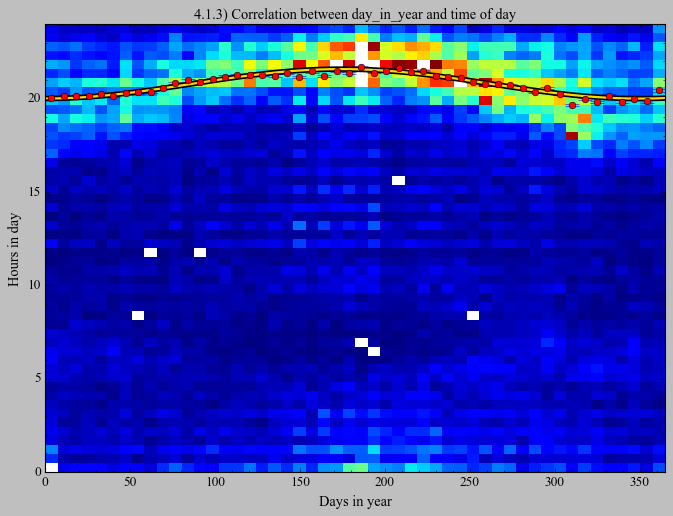

In [65]:
# 4.1.3) Correlation between day_in_year and time of day

#first i make a simple linear correlation coefficient using the pearson i stats 
print(f'Pearson correlation coefficient: {stats.pearsonr(days_in_year, hours_in_day)[0]:.4f}, with p-value: {stats.pearsonr(days_in_year, hours_in_day)[1]:.3}')

fig,ax = plt.subplots(figsize=(10,7))
ax.set(ylabel='Hours in day', xlabel='Days in year', title='4.1.3) Correlation between day_in_year and time of day')#, xlim=(0,24), ylim=(0,365));
ax.hist2d(days_in_year, hours_in_day, bins=50, range=((0,365),(0,24)),cmin=0.1,cmax=200);
# ax.scatter(days_in_year, hours_in_day, s=0.2, c='k', alpha=0.5);


#calculate the 1D profile of the voltage and the wavelength
x1, y1, yerr1 = profile_x(days_in_year, hours_in_day, bins=50, xyrange=[(0,365),(16,24)])

#plot the 1D profile
ax.errorbar(x1, y1, yerr=yerr1, fmt='o', mec='k',mfc='r',capsize=6, label='1D profile')

#fit a sine func to the 1D profile to match the periodicity of a year (365 days) in which the length of a day changes

def sine_func(x, A, B, C, D):
    return A*np.sin(B*x + C) + D

Chi2_sine = Chi2Regression(sine_func, x1, y1, yerr1)
minuit = Minuit(Chi2_sine,  A=5, B=2*np.pi/365, C=0, D=21)
minuit.migrad()

#plot the fit
x_fit = np.linspace(0,365,100)
ax.plot(x_fit, sine_func(x_fit, *minuit.values), 'k-', lw=5, label='sine fit')
ax.plot(x_fit, sine_func(x_fit, *minuit.values), 'gold', lw=2, label='sine fit');


print('Conclusions: It is clearly seen that observations are more frequent during the evening, and less frequent between midnight and 4pm. The 1D profile of the data shows a periodicity of 365 days, which is the length of a year. The sine fit to the 1D profile shows that the length of a day is not constant, but changes with the year. The length of a day is longer during the summer, and shorter during the winter.')




Kolmogorov-Smirnof test west weekday data: 0.113 with p-value: 0.0000
Kolmogorov-Smirnof test for actual uniform data: 0.00556 with p-value: 0.2918


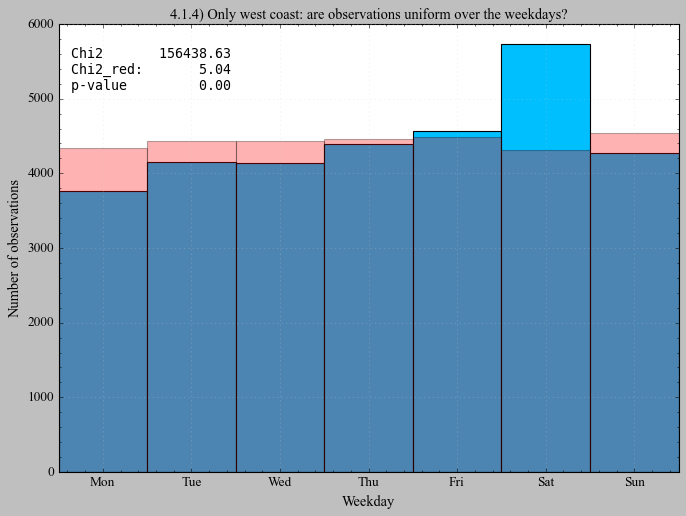

In [161]:
# 4.1.4) Only west coast: are observations uniform over the weekdays?
west_wd = weekday[coast==0]+0.5

fig , ax = plt.subplots(figsize=(10,7))
ax.hist(west_wd, bins=7, range=(0,7), color='deepskyblue', lw=1, label='West Coast');
ax.set(xlabel='Weekday', ylabel='Number of observations', title='4.1.4) Only west coast: are observations uniform over the weekdays?');
ax.set_xticks(np.arange(7)+.5), ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

#plot uniform distribution
gen_uni = stats.uniform.rvs(size=len(west_wd), loc=0, scale=7)
ax.hist(gen_uni, bins=7, range=(0,7), color='r', lw=1, label='Uniform distribution', alpha=0.3);

Chi2 = np.sum((gen_uni - west_wd)**2/ west_wd)
d = {'Chi2': Chi2,'Chi2_red:': Chi2/len(west_wd), 'p-value': stats.chi2.sf(Chi2, 7)}
text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.02, 0.95, text, ax, fontsize=12)

#test if the distribution is uniform 
ks , p = stats.kstest(west_wd, 'uniform', args=(0,7))
print(f'Kolmogorov-Smirnof test west weekday data: {ks:.3} with p-value: {p:.4f}')

ks_gen , p_gen = stats.kstest(gen_uni, 'uniform', args=(0,7))
print(f'Kolmogorov-Smirnof test for actual uniform data: {ks_gen:.3} with p-value: {p_gen:.4f}')




## 5) Fitting data

### 5.1)

### 5.2)